In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the dataset
df = pd.read_csv('1429_1.csv')

# Display the first few rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

C:\Users\Sunil\AppData\Local\Temp\ipykernel_17024\1381857122.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1429_1.csv')


In [3]:
# Preprocess the data
df = df.dropna(subset=['reviews.text', 'reviews.rating'])
df['sentiment'] = df['reviews.rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

In [4]:

df.isnull().sum()


id                          0
name                     6759
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               29
reviews.dateAdded       10587
reviews.dateSeen            0
reviews.didPurchase     34625
reviews.doRecommend       560
reviews.id              34625
reviews.numHelpful        495
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title               6
reviews.userCity        34626
reviews.userProvince    34626
reviews.username            7
sentiment                   0
dtype: int64

In [5]:
# Handle missing values
df1 = df.fillna(method='ffill')  # Forward fill

C:\Users\Sunil\AppData\Local\Temp\ipykernel_17024\1918398014.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill')  # Forward fill
C:\Users\Sunil\AppData\Local\Temp\ipykernel_17024\1918398014.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df.fillna(method='ffill')  # Forward fill


In [6]:
# Preprocess the data
df1['sentiment'] = df1['reviews.rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

In [7]:
# Split the data
X = df1['reviews.text']
y = df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature extraction
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [10]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9442679757435749
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.18      0.29       435
    positive       0.95      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.84      0.59      0.63      6926
weighted avg       0.93      0.94      0.93      6926



In [11]:
# Circular Bar Chart
def create_circular_bar_chart(data, labels):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', textprops=dict(color="w"))
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"))
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, bbox=bbox_props, **kw)
    
    ax.set_title("Sentiment Analysis Results")
    plt.show()

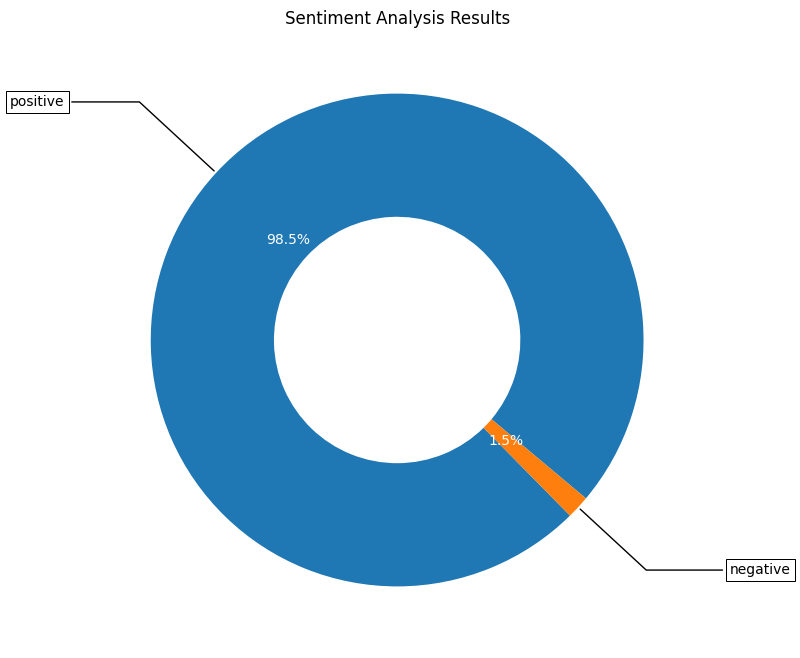

In [12]:
# Prediction counts
prediction_counts = pd.Series(y_pred).value_counts()
create_circular_bar_chart(prediction_counts.values, prediction_counts.index)

In [15]:
import joblib

joblib.dump(model, 'hack_model.pkl')


# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'hack_tfidf_vectorizer.pkl')

# Save the label encoder (if you used one)
# joblib.dump(label_encoder, 'label_encoder.pkl')

['hack_tfidf_vectorizer.pkl']